In [ ]:
from tensorflow import keras, cast, float32
from keras import Sequential, layers
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input


In [ ]:
dataset = keras.preprocessing.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/Bell_Paper_Images/",\
    image_size = (256, 256),
    batch_size = 32,
    shuffle = True
    )

Found 1997 files belonging to 2 classes.


In [ ]:
class_list = dataset.class_names
class_list[0] = "Infected Leaf"
class_list[1] = 'Healthy Leaf'
class_list

['Infected Leaf', 'Healthy Leaf']

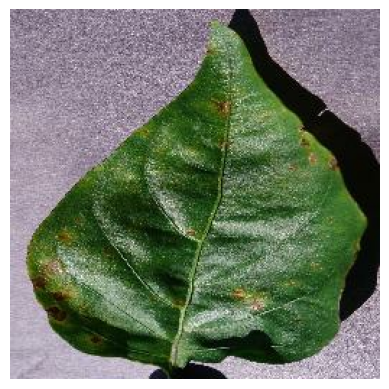

In [ ]:
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype('uint8'))
  plt.axis('off')

In [ ]:
def process(image, label):
  image = cast(image/255., float32)
  return image, label

dataset = dataset.map(process)

In [ ]:
train_ds = dataset.take(50)
test_ds = dataset.skip(50)
valid_ds = test_ds.take(6)
test_ds = test_ds.skip(6)

In [ ]:
augmentation = Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2)
])

In [ ]:
model = Sequential(augmentation)

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.build((32, 256, 256, 3))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 12, batch_size = 32, validation_data = valid_ds)

Epoch 1/12
50/50 [==============================] - 335s 7s/step - loss: 0.4893 - accuracy: 0.7506 - val_loss: 0.3568 - val_accuracy: 0.9219
Epoch 2/12
50/50 [==============================] - 250s 5s/step - loss: 0.2203 - accuracy: 0.9262 - val_loss: 0.2821 - val_accuracy: 0.9010
Epoch 3/12
50/50 [==============================] - 249s 5s/step - loss: 0.1747 - accuracy: 0.9413 - val_loss: 0.1587 - val_accuracy: 0.9635
Epoch 4/12
50/50 [==============================] - 249s 5s/step - loss: 0.0897 - accuracy: 0.9700 - val_loss: 0.0346 - val_accuracy: 0.9896
Epoch 5/12
50/50 [==============================] - 242s 5s/step - loss: 0.0825 - accuracy: 0.9775 - val_loss: 0.0622 - val_accuracy: 0.9792
Epoch 6/12
50/50 [==============================] - 253s 5s/step - loss: 0.0575 - accuracy: 0.9812 - val_loss: 0.1400 - val_accuracy: 0.9896
Epoch 7/12
50/50 [==============================] - 252s 5s/step - loss: 0.0287 - accuracy: 0.9919 - val_loss: 0.0111 - val_accuracy: 0.9948
Epoch 8/12
50

1/1 [==============================] - 0s 61ms/step


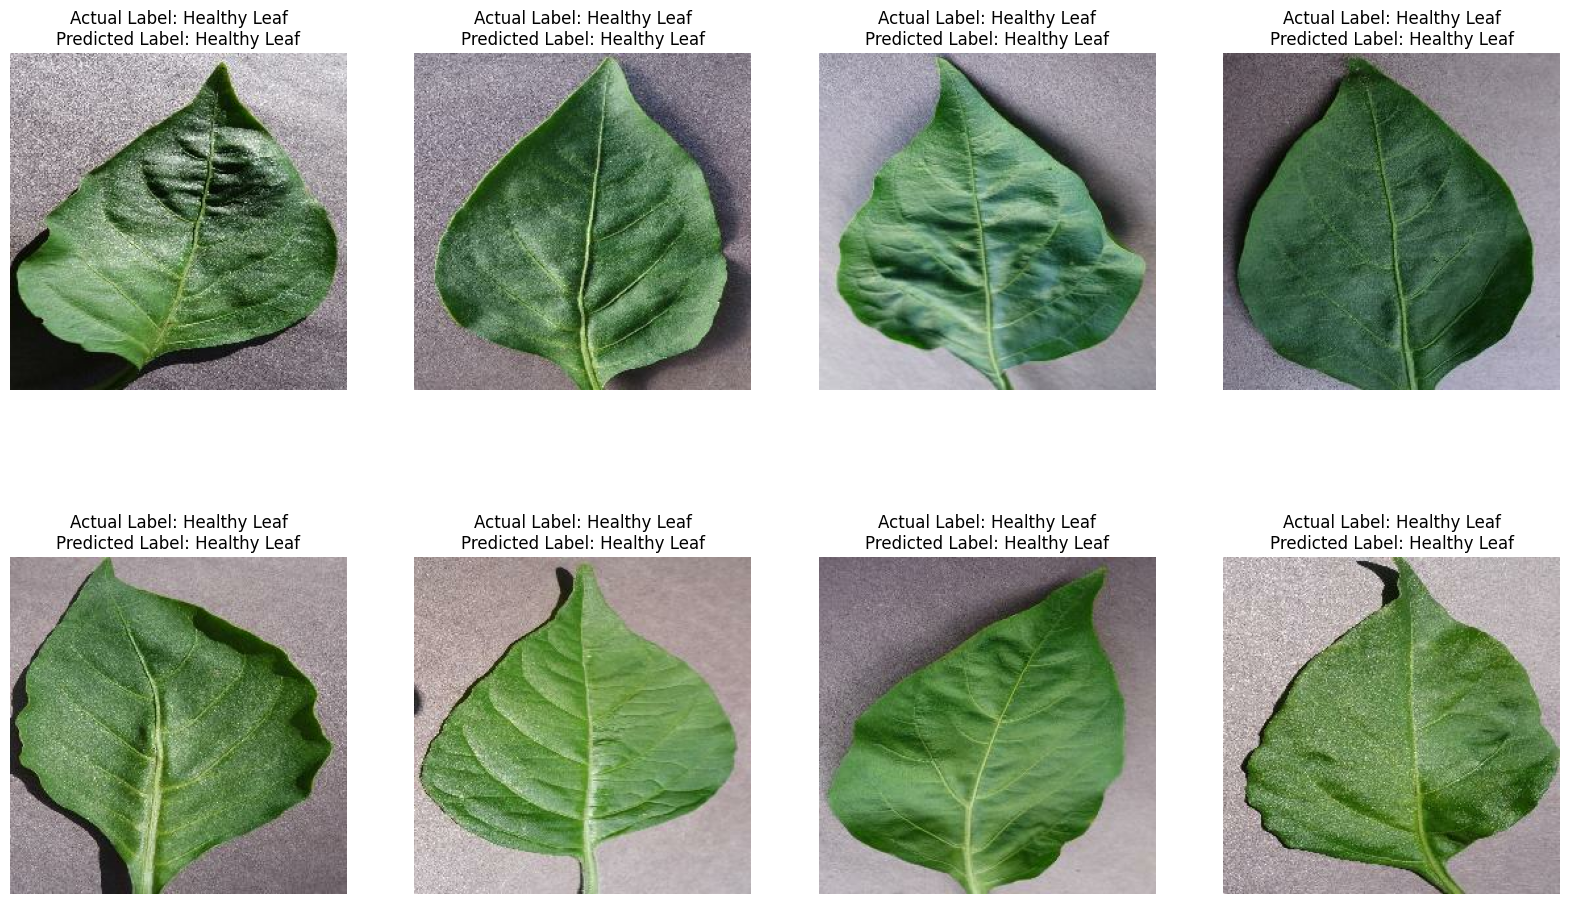

In [ ]:
for image_batch, label_batch in test_ds.take(1):
  plt.figure(figsize = (20, 12))
  for i in range(8):
      ax = plt.subplot(2, 4, i+1)
      test_image = image_batch[i].numpy()
      test_label = label_batch[i].numpy()
      test_image = np.expand_dims(test_image, axis=0)
      x = round(model.predict(test_image)[0][0])
      plt.title("Actual Label: " + class_list[test_label] + "\n" + "Predicted Label: " + class_list[x])
      plt.imshow(image_batch[i].numpy())
      plt.axis('off')


Enter path: /content/Bell_Pepper_Helathy.jpg
1/1 [==============================] - 0s 52ms/step


Text(0.5, 1.0, 'Predicted Label: Healthy Leaf')

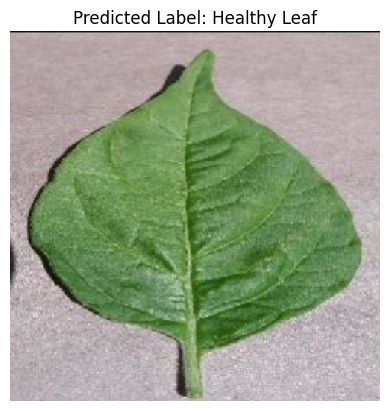

In [ ]:
path = input("Enter path: ")
try:
  img = image.load_img(path, target_size = (256, 256))
  test_image = image.img_to_array(img)
except FileNotFoundError:
  print("A file with this name/path doesn't exist. Please enter an existing file")
except:
  print("The file isn't in the desired format. Please make sure it's in png, jpg or jpeg")


test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
x = round(model.predict(test_image)[0][0])
plt.imshow(img)
plt.axis('off')
plt.title("Predicted Label: " + class_list[x])
